In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('diffexpr_data.tsv', sep='\t')
df['log10_p'] = -np.log10(df.pval_corr)

In [6]:
def map_color(x):
    logFC, log10 = x
    p = -np.log10(0.05)
    if logFC < 0 and log10 > p:
        return 'Significantly downregulated'
    elif logFC > 0 and log10 > p:
        return 'Significantly upregulated'
    elif logFC < 0 and log10 < p:
        return 'Non-significantly downregulated'
    return 'Non-significantly upregulated'

df['color'] = df[['logFC', 'log10_p']].apply(map_color, axis = 1)

In [7]:
df.head()

,Sample,logFC,pval,pval_corr,log_pval,log10_p,color
0,PNLIP,10.092524,0.659033,1.0,-0.0,-0.0,Non-significantly upregulated
1,CELA2A,8.691414,0.582390,1.0,-0.0,-0.0,Non-significantly upregulated
2,CLPS,8.054078,0.651733,1.0,-0.0,-0.0,Non-significantly upregulated
3,MPO,7.817773,0.448334,1.0,-0.0,-0.0,Non-significantly upregulated
4,AMY2A,7.285231,0.632441,1.0,-0.0,-0.0,Non-significantly upregulated


In [8]:
res = []
for i in range(len(df)):
    if df['log10_p'].iloc[i] > -np.log10(0.05):
        res.append([df['logFC'].iloc[i], df['log10_p'].iloc[i], df['Sample'].iloc[i]])
res = sorted(res)

max1, max2, min1, min2 = res[-1], res[-2], res[0], res[1]

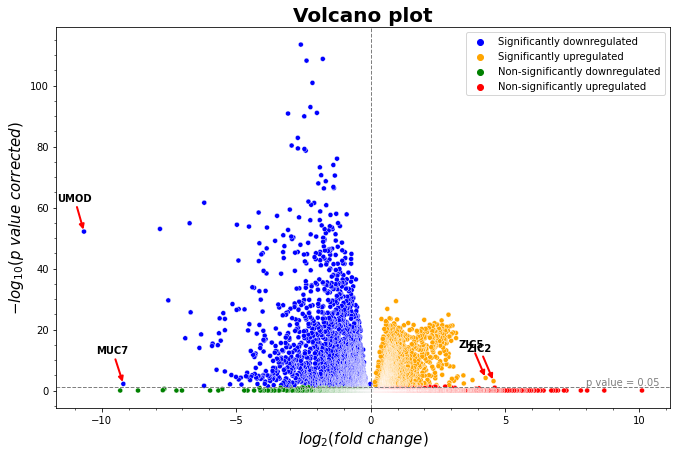

In [9]:
plt.figure(figsize = (11,7))

ax = sns.scatterplot(data = df, x = 'logFC', y = 'log10_p',
                     hue = 'color', hue_order = ['Significantly downregulated', 'Significantly upregulated', 'Non-significantly downregulated', 'Non-significantly upregulated'],
                     palette = ['blue', 'orange', 'green', 'red'], s = 25)

ax.axhline(-np.log10(0.05), color ='gray', lw = 1, ls = '--')
ax.text(8, -np.log10(0.05) + 0.5, 'p value = 0.05', color ='gray')
ax.axvline(0, color ='gray', lw = 1, ls = '--')
ax.legend()

ax.xaxis.get_ticklocs(minor=True)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.annotate(max1[2], xy=(max1[0], max1[1]), xytext=(max1[0] - 1, max1[1] + 10), fontweight='bold', arrowprops=dict(arrowstyle= '-|>', color='red', lw=2, ls='-'))
ax.annotate(max2[2], xy=(max2[0], max2[1]), xytext=(max2[0] - 1, max2[1] + 10), fontweight='bold', arrowprops=dict(arrowstyle= '-|>', color='red', lw=2, ls='-'))
ax.annotate(min1[2], xy=(min1[0], min1[1]), xytext=(min1[0] - 1, min1[1] + 10), fontweight='bold', arrowprops=dict(arrowstyle= '-|>', color='red', lw=2, ls='-'))
ax.annotate(min2[2], xy=(min2[0], min2[1]), xytext=(min2[0] - 1, min2[1] + 10), fontweight='bold', arrowprops=dict(arrowstyle= '-|>', color='red', lw=2, ls='-'))


plt.xlabel("$log_{2} (fold\ change)$", size = 15, fontweight='bold')
plt.ylabel("$-log_{10} (p\ value\ corrected)$", size = 15, fontweight='bold')
plt.title("Volcano plot", size = 20, fontweight='bold')

plt.savefig('volcano.png', dpi = 600, bbox_inches = 'tight', facecolor = 'white')

plt.show()